In [4]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

import keras

Using TensorFlow backend.


In [5]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.models import model_from_json

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
import matplotlib.image as mpimg

In [8]:
import numpy as np
import scipy
import re

In [9]:
from PIL import Image

In [10]:
current_path = os.getcwd()
os.chdir(current_path)

## Load Previous Models?

In [ ]:
load_previous_model = True

## Set Model metaparameters

In [11]:
batch_size = 128
num_classes = 10
epochs = 1

## Load MNIST Data

In [12]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## Setup Training and Test Data

In [13]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


## Convert y_train and y_test to categorical datatypes

In [14]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## Construct Model

In [15]:
def new_model(input_dim=784, hidden_dim=512, dropout_rate=0.2):
    
    # Initialize model
    model = Sequential()
    
    # Layer 1 - INPUT
    model.add(Dense(hidden_dim, activation='relu', input_shape=(input_dim,)))
    model.add(Dropout(dropout_rate))
    
    # Layer 2 - HIDDEN
    model.add(Dense(hidden_dim, activation='relu'))
    model.add(Dropout(dropout_rate))
    
    # Layer 3 - OUTPUT
    model.add(Dense(10, activation='softmax'))
    
    # Compile model
    model.compile(loss='categorical_crossentropy',
                  optimizer=RMSprop(),
                  metrics=['accuracy'])
    
    print(model.summary())
    
    return model

## Load Models

In [16]:
def load_model(model_num):

    # set model name
    model_name = "models/model_{}".format(model_num)
    
    # load json and create model
    json_file = open('{}.json'.format(model_name), 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    
    loaded_model = model_from_json(loaded_model_json)
    
    # load weights into new model
    loaded_model.load_weights("{}_weights.h5".format(model_name))
    print("Loaded model {} from disk".format(model_num))
    
    # Compile model
    loaded_model.compile(loss='categorical_crossentropy',
                  optimizer=RMSprop(),
                  metrics=['accuracy'])
    
    return loaded_model

### Create Models

In [73]:
previous_models = {}
for item in os.listdir("./models"):
    
    model_num_str = re.findall(r'\d', item.split(".")[0])
    if not model_num_str:
        continue
        
    
    
    print(model_num_str)
#     if 'json' in item:
#         model_file = item
#         model_num_str = re.findall(r'\d', model_file)
#         model_num = int(model_num_str[0])
        
#         previous_models[model_num]["model_file"] = model_file
        
#     elif 'h5' in item:
#         weight_file = item
#         model_num_str = re.findall(r'\d', weight_file.split(".")[0])
#         print(model_num_str)
#         model_num = int(model_num_str[0])
        
#         previous_models[model_num]["weight_file"] = weight_file

['1']
['1']
['2']
['2']
['3']
['3']


In [15]:
models = {
          "Model 1" : {"model" : None, "layers" : {}, "training_epochs" : 10},
          "Model 2" : {"model" : None, "layers" : {}, "training_epochs" : 10},
          "Model 3" : {"model" : None, "layers" : {}, "training_epochs" : 10}
         }

if not load_previous_model:
    model_1 = load_model(1)
    model_2 = load_model(2)
    model_3 = load_model(3) 
else:
    model_1 = new_model(dropout_rate=0.2)
    model_2 = new_model(dropout_rate=0.4)
    model_3 = new_model(dropout_rate=0.9)
       

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706.0
Trainable params: 669,706.0
Non-trainable params: 0.0
_________________________________________________________________
None
_________________________________________________________________
Layer (type)                 Output Shape              Para

## Define Models List

In [16]:
models = {
          "Model 1" : {"model" : model_1, "layers" : {}, "training_epochs" : 10},
          "Model 2" : {"model" : model_2, "layers" : {}, "training_epochs" : 10},
          "Model 3" : {"model" : model_3, "layers" : {}, "training_epochs" : 10}
         }

## Train Models

In [17]:
if not load_previous_model:

    for model_name, items in models.items():

        # Set model
        model = items["model"]
        training_epochs = items["training_epochs"]

        # Fit model
        print(model_name)
        model.fit(x_train, y_train, epochs=training_epochs, batch_size=batch_size, validation_data=(x_test, y_test))
        print("\n")

Model 1
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s - loss: 0.2497 - acc: 0.9224 - val_loss: 0.1038 - val_acc: 0.9670
Epoch 2/10
60000/60000 [==============================] - 5s - loss: 0.1040 - acc: 0.9680 - val_loss: 0.0927 - val_acc: 0.9735
Epoch 3/10
60000/60000 [==============================] - 5s - loss: 0.0779 - acc: 0.9764 - val_loss: 0.0773 - val_acc: 0.9772
Epoch 4/10
60000/60000 [==============================] - 5s - loss: 0.0641 - acc: 0.9805 - val_loss: 0.0739 - val_acc: 0.9788
Epoch 5/10
60000/60000 [==============================] - 5s - loss: 0.0528 - acc: 0.9852 - val_loss: 0.0780 - val_acc: 0.9801
Epoch 6/10
60000/60000 [==============================] - 5s - loss: 0.0488 - acc: 0.9857 - val_loss: 0.0655 - val_acc: 0.9833
Epoch 7/10
60000/60000 [==============================] - 5s - loss: 0.0415 - acc: 0.9879 - val_loss: 0.0806 - val_acc: 0.9811
Epoch 8/10
60000/60000 [=============================

## Score Models

In [18]:
for model_name, items in models.items():
    print(model_name)
    model = items["model"]
    score = model.evaluate(x_test, y_test, verbose=0)
    models[model_name]["score"] = {"test loss" : score[0], "test accuracy" : score[1]}
    
    print('Test loss: {}'.format(score[0]))
    print('Test accuracy: {}'.format(score[1]))
    print("\n")

Model 1
Test loss: 0.11979441314617092
Test accuracy: 0.9754


Model 2
Test loss: 0.08790153632714569
Test accuracy: 0.9812


Model 3
Test loss: 0.35932731767185033
Test accuracy: 0.9275




## Save Trained Model and Weights to file

In [19]:
if not load_previous_model:
    for model_name, items in models.items():

        # Format model name for saving
        model_name = model_name.replace(" ", "_").lower()

        # Set model
        model = items["model"]

        # serialize model to JSON
        model_json = model.to_json()

        # Write model to file
        outfile_name = "models/{}.json".format(model_name)
        with open(outfile_name, "w") as json_file:
            json_file.write(model_json)

        # Serialize weights to HDF5 and save
        model.save_weights("models/{}_weights.h5".format(model_name))

        print("Saved {} to disk.".format(model_name))

Saved model_1 to disk.
Saved model_2 to disk.
Saved model_3 to disk.


## Prediction

### Pick random image from set

In [20]:
test_img = x_train[np.random.randint(len(x_train))]

### View Image

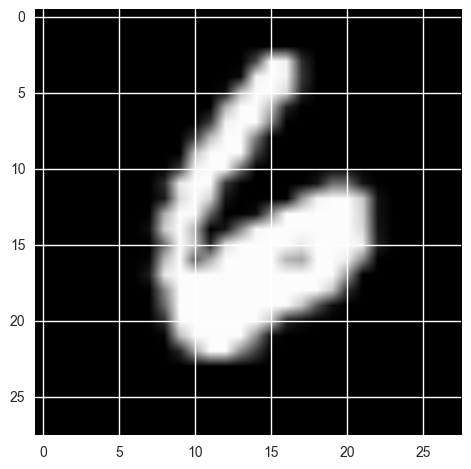

In [21]:
# Dimensions of photo
h = int(np.sqrt(test_img.shape[0]))
w = h

# Transform image: 1D -> 2D
print_img = test_img.reshape(w, h)

# Plot image
plt.imshow(print_img, cmap=plt.get_cmap('gray'))
plt.show()

### Get Prediction

In [22]:
def predict_image(model, img, method=1):
    print_img = np.array([img])
    
    if method == 1:
        prediction_1 = model.predict(np.array(print_img))
        prediction = np.argmax(prediction_1)
    else:
        prediction = model.predict_classes(print_img, verbose=0)[0]
    
    return prediction

### Process custom image

In [23]:
def process_img(raw_img):
    
    # Reshape to correct resolution
    h = int(np.sqrt(test_img.shape[0]))
    w = h
    small_img = scipy.misc.imresize(img, size=(w, h))
    
    # Flatten and reverse for prediction
    prediction_image = small_img.flatten()
    
    
    # Mask
    mask_background = prediction_image > np.mean(prediction_image)
    prediction_image[mask_background] = 0
    
    
    # Unflatten for print print
    print_img = prediction_image.reshape(w, h)
    
    return prediction_image, print_img

## Get accuracy on custom images

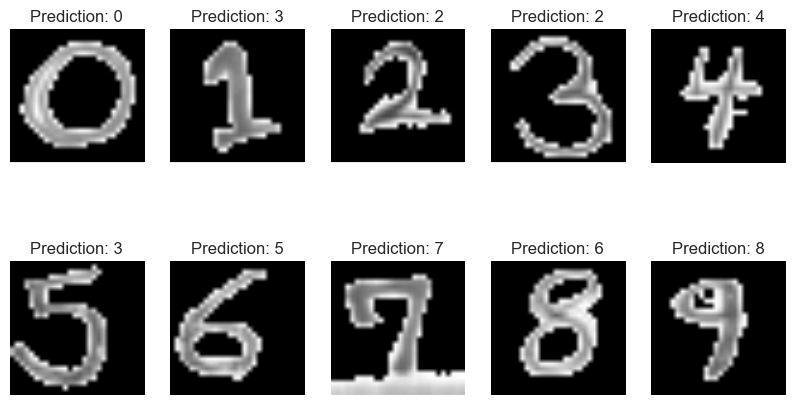

Accuracy: 0.60


In [24]:
load_ext_img = True

if load_ext_img:
    
    # Select model for prediction
    model = models["Model 2"]["model"]
        
    # Load image
    custom_images = {int(re.findall(r'\d', image)[0]) : image for image in os.listdir("./test_data") if "png" in image}
    
    total_num_tests = len(custom_images)
    incorrect_counter = 0
    
    fig = plt.figure()
    for plot_index, (y, image_name) in enumerate(custom_images.items(), 1):
        
        # Set image
        img = scipy.misc.imread('test_data/{}'.format(image_name), mode='L')
    
        # Process image
        prediction_image, print_img = process_img(img)

        # Predict
        y_hat = predict_image(model, prediction_image)
        
        if y_hat != y:
            incorrect_counter += 1
        
        predict_results = "Prediction: {}".format(y_hat)
        
        
        # Print image
        num_rows = 2
        num_cols = 5
        ax = fig.add_subplot(num_rows, num_cols, plot_index)
        plt.imshow(prediction_image.reshape(w, h), cmap=plt.get_cmap('gray'))
        
        ax.set_title(predict_results)
        ax.set_xticks([])
        ax.set_yticks([])

    fig.set_figwidth(10)
    plt.show()
    
    
    custom_accuracy = incorrect_counter / total_num_tests
    
    print("Accuracy: {:.2f}".format(custom_accuracy))
    

## Extract Weight Matrices from Model

In [25]:
import codecs, json 

def numpy_arr_to_json(numpy_arr, name):
    b = numpy_arr.tolist() # nested lists with same data, indices
    file_path = "json_files/{}.json".format(name) ## your path variable
    json.dump(b, codecs.open(file_path, 'w', encoding='utf-8'), separators=(',', ':'), sort_keys=True, indent=4)


In [44]:
json_write_on = True

for model_name, items in models.items():
    model = items["model"]
    layers = model.get_weights()
    
    for layer_i, layer_weights in enumerate(layers, 1):
        layer_id = "layer {}".format(layer_i)
        models[model_name]["layers"][layer_id] = layer_weights
        file_name = model_name.replace(" ", "_") + "_layer_" + str(layer_i)
        if json_write_on:
            numpy_arr_to_json(layer_weights, file_name)

## Set cmap

In [27]:
cmap = sns.diverging_palette(145, 280, s=85, l=25, n=7, as_cmap=True)

## Layer 1 Heatmap Visualization

### Model 1

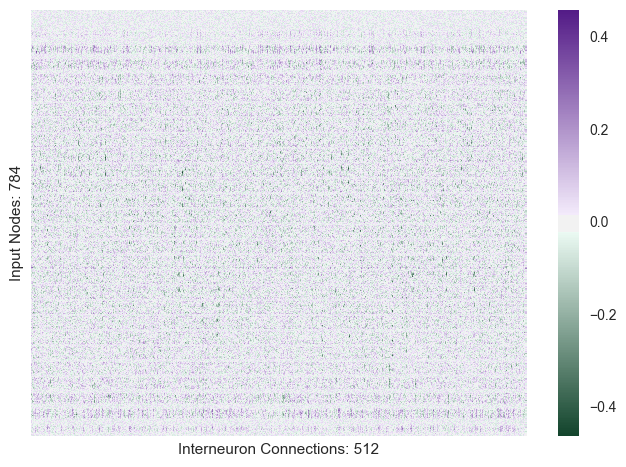

In [28]:
layer_1 = models["Model 1"]["layers"]["layer 1"]

# Generate layer
layer_1_vis = sns.heatmap(layer_1, cmap=cmap)

# Remove x and y ticks
layer_1_vis.set(xticks=[])
layer_1_vis.set(yticks=[])

# Set x and y labels
layer_1_vis.set_xlabel('Interneuron Connections: {}'.format(layer_1.shape[1]))
layer_1_vis.set_ylabel('Input Nodes: {}'.format(layer_1.shape[0]))

# Show plot
plt.show()

### Model 2

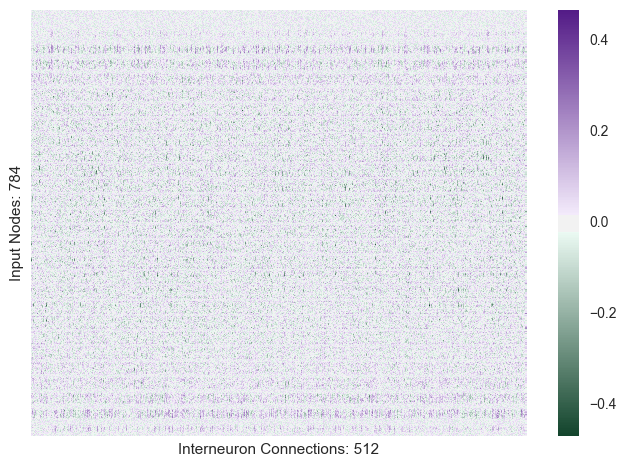

In [29]:
layer_1 = models["Model 2"]["layers"]["layer 1"]

# Generate layer
layer_1_vis = sns.heatmap(layer_1, cmap=cmap)

# Remove x and y ticks
layer_1_vis.set(xticks=[])
layer_1_vis.set(yticks=[])

# Set x and y labels
layer_1_vis.set_xlabel('Interneuron Connections: {}'.format(layer_1.shape[1]))
layer_1_vis.set_ylabel('Input Nodes: {}'.format(layer_1.shape[0]))

# Show plot
plt.show()

### Model 1 - Model 2 Difference

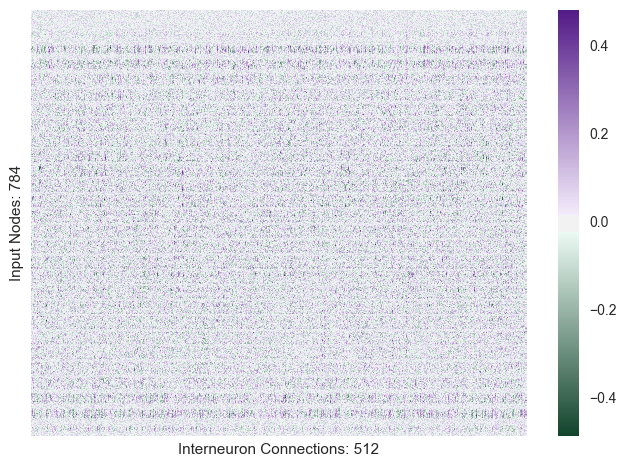

In [30]:
model_1_layer_1 = models["Model 1"]["layers"]["layer 1"]
model_2_layer_1 = models["Model 2"]["layers"]["layer 1"]

difference = model_2_layer_1 - model_1_layer_1

# Generate layer
layer_1_difference = sns.heatmap(difference, cmap=cmap)

# Remove x and y ticks
layer_1_difference.set(xticks=[])
layer_1_difference.set(yticks=[])

# Set x and y labels
layer_1_difference.set_xlabel('Interneuron Connections: {}'.format(difference.shape[1]))
layer_1_difference.set_ylabel('Input Nodes: {}'.format(difference.shape[0]))

# Show plot
plt.show()

## Layer 3 Heatmap Visualization

### Model 1

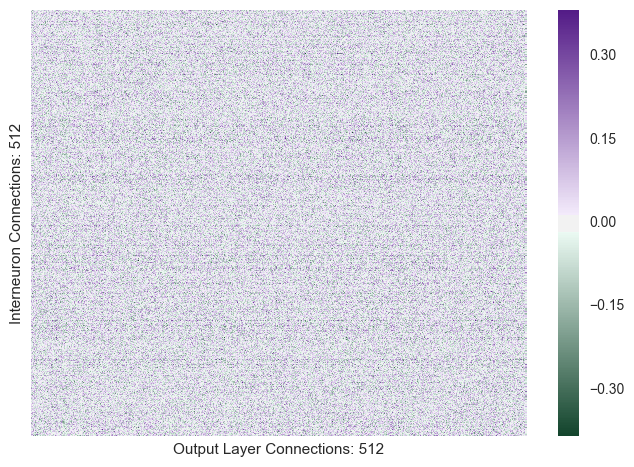

In [31]:
# Set layer
layer_3 = models["Model 1"]["layers"]["layer 3"]

# Generate layer
layer_3_vis = sns.heatmap(layer_3, cmap=cmap)

# Remove x and y ticks
layer_3_vis.set(xticks=[])
layer_3_vis.set(yticks=[])

# Set x and y labels
layer_3_vis.set_xlabel('Output Layer Connections: {}'.format(layer_3.shape[1]))
layer_3_vis.set_ylabel('Interneuron Connections: {}'.format(layer_3.shape[0]))

# Show plot
plt.show()

### Model 2

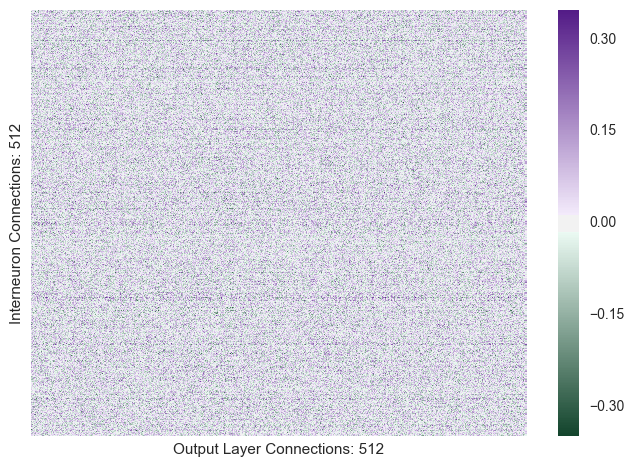

In [32]:
# Set layer
layer_3 = models["Model 2"]["layers"]["layer 3"]

# Generate layer
layer_3_vis = sns.heatmap(layer_3, cmap=cmap)

# Remove x and y ticks
layer_3_vis.set(xticks=[])
layer_3_vis.set(yticks=[])

# Set x and y labels
layer_3_vis.set_xlabel('Output Layer Connections: {}'.format(layer_3.shape[1]))
layer_3_vis.set_ylabel('Interneuron Connections: {}'.format(layer_3.shape[0]))

# Show plot
plt.show()

## Layer 5 Heatmap Visualization

### Model 1

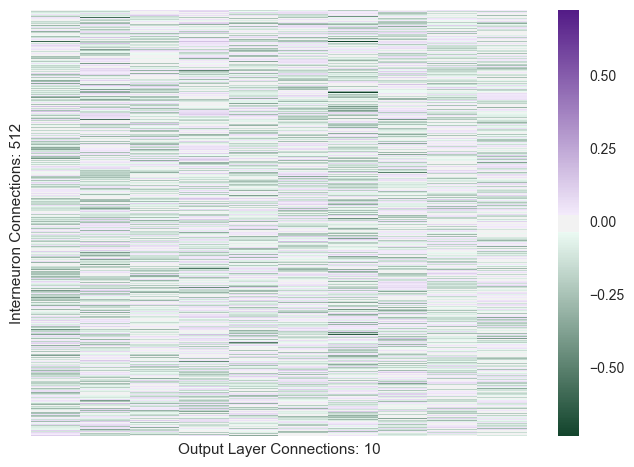

In [33]:
# Set layer
layer_5 = models["Model 1"]["layers"]["layer 5"]

# Generate layer
layer_5_vis = sns.heatmap(layer_5, cmap=cmap)

# Remove x and y ticks
layer_5_vis.set(xticks=[])
layer_5_vis.set(yticks=[])

# Set x and y labels
layer_5_vis.set_xlabel('Output Layer Connections: {}'.format(layer_5.shape[1]))
layer_5_vis.set_ylabel('Interneuron Connections: {}'.format(layer_5.shape[0]))


# Show plot
plt.show()

### Model 2

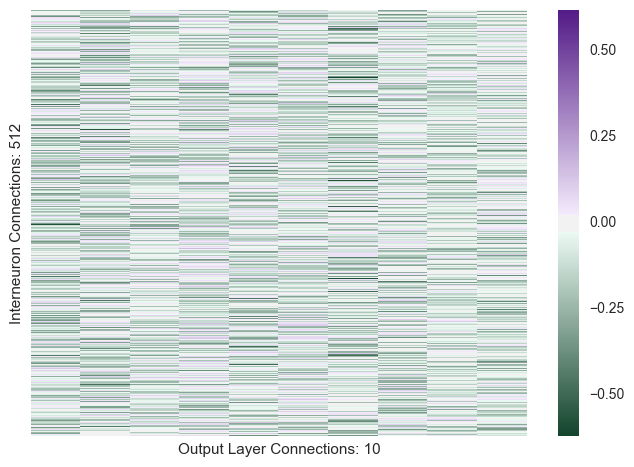

In [34]:
# Set layer
layer_5 = models["Model 2"]["layers"]["layer 5"]

# Generate layer
layer_5_vis = sns.heatmap(layer_5, cmap=cmap)

# Remove x and y ticks
layer_5_vis.set(xticks=[])
layer_5_vis.set(yticks=[])

# Set x and y labels
layer_5_vis.set_xlabel('Output Layer Connections: {}'.format(layer_5.shape[1]))
layer_5_vis.set_ylabel('Interneuron Connections: {}'.format(layer_5.shape[0]))


# Show plot
plt.show()

### Model 3

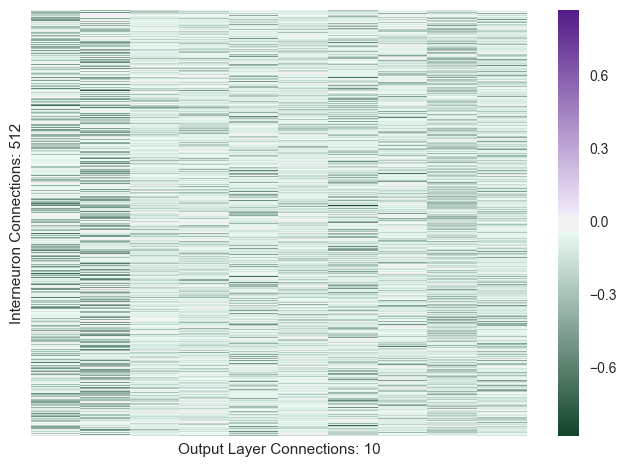

In [35]:
# Set layer
layer_5 = models["Model 3"]["layers"]["layer 5"]

# Generate layer
layer_5_vis = sns.heatmap(layer_5, cmap=cmap)

# Remove x and y ticks
layer_5_vis.set(xticks=[])
layer_5_vis.set(yticks=[])

# Set x and y labels
layer_5_vis.set_xlabel('Output Layer Connections: {}'.format(layer_5.shape[1]))
layer_5_vis.set_ylabel('Interneuron Connections: {}'.format(layer_5.shape[0]))


# Show plot
plt.show()

### Model 1 - Model 2 Difference

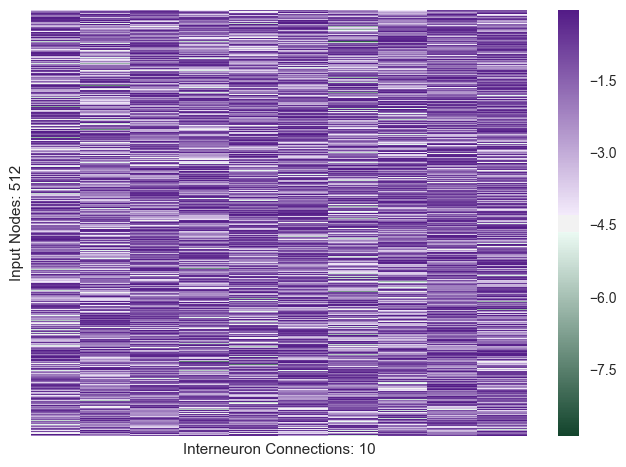

In [36]:
model_1_layer_5 = models["Model 1"]["layers"]["layer 5"]
model_2_layer_5 = models["Model 2"]["layers"]["layer 5"]

average = np.mean([model_1_layer_5, model_2_layer_5])
difference = np.abs(model_1_layer_5 - model_2_layer_5) / average

# Generate layer
layer_5_difference = sns.heatmap(difference, cmap=cmap)

# Remove x and y ticks
layer_5_difference.set(xticks=[])
layer_5_difference.set(yticks=[])

# Set x and y labels
layer_5_difference.set_xlabel('Interneuron Connections: {}'.format(difference.shape[1]))
layer_5_difference.set_ylabel('Input Nodes: {}'.format(difference.shape[0]))

# Show plot
plt.show()

### Model 1 - Model 3 Difference

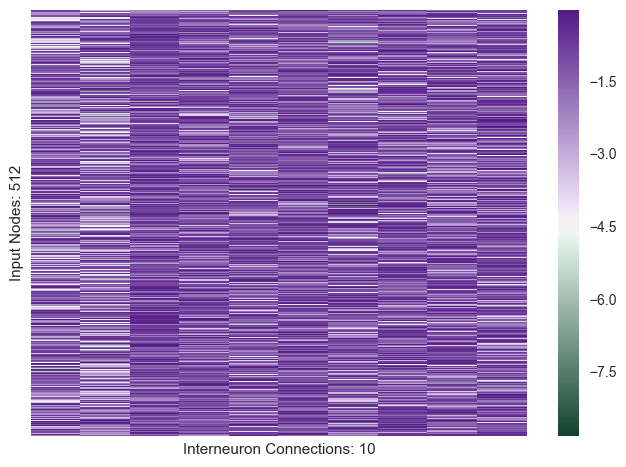

In [37]:
model_1_layer_5 = models["Model 1"]["layers"]["layer 5"]
model_3_layer_5 = models["Model 3"]["layers"]["layer 5"]

average = np.mean([model_1_layer_5, model_3_layer_5])
difference = np.abs(model_1_layer_5 - model_3_layer_5) / average

# Generate layer
layer_5_difference = sns.heatmap(difference, cmap=cmap)

# Remove x and y ticks
layer_5_difference.set(xticks=[])
layer_5_difference.set(yticks=[])

# Set x and y labels
layer_5_difference.set_xlabel('Interneuron Connections: {}'.format(difference.shape[1]))
layer_5_difference.set_ylabel('Input Nodes: {}'.format(difference.shape[0]))

# Show plot
plt.show()

# Weight Matrix Plots

In [38]:
# Set plot type
plot_types = ["seaborn", "matplotlib"]
plot_type = plot_types[0]

plot_models = ["all", "model 1", "model 2", "model 3"]
plot_model = plot_models[0]

In [40]:
def plot_layers():
    # Plot parameters
    model_num = 2
    fig_height = 30
    fig_width = 15
    fig_h_space = 0.8
    bar_alpha_vals = 0.5
    colors = ["#99ff99", "#ccff99", "#ccccff", "#ccf2ff", "#ffd9b3"]
    subplot_num = len(layers)

    model_layers_list = [[layer.flatten() for layer in models[model_name]["layers"].values()] for model_name in models.keys()]

    model_layers = zip(*model_layers_list)

    fig = plt.figure()
    for layer_i, model_layer in enumerate(model_layers, 1):

        # Create axis
        ax = fig.add_subplot(subplot_num, 1, layer_i)

        # Set layer label
        layer_label = "Layer {}".format(layer_i)


        for model_num, model_layer in enumerate(model_layer, 1):
            model_name = "Model {}".format(model_num)

            if plot_model != "all" and plot_model != model_name.lower():
                continue

            model_color = colors[model_num % len(colors)]

            model_accuracy = models[model_name]["score"]["test accuracy"]
            model_label = "{} - Accuracy: {:0.3f}".format(model_name, model_accuracy)

            if plot_type is "seaborn":
                sns.distplot(model_layer, bins='auto', kde=False, rug=False, ax=ax, color=model_color, label=model_label, hist_kws=dict(alpha=bar_alpha_vals))
            elif plot_type is "matplotlib":
                ax.hist(model_layer, bins='auto', color=model_color, label=model_label, alpha=bar_alpha_vals)


        # Set ax title, legend, axis labels
        if plot_model is "all":
            ax.set_title("{}".format(layer_label))
            ax.legend(loc='best')
        else:
            ax.set_title("{} : {}".format(plot_model.capitalize(), layer_label))        

        ax.set_xlabel('Weight Values', fontsize = 9)
        ax.set_ylabel('Count', fontsize = 9)

    # Set background white
    sns.set_style("whitegrid")

    # Set fig attrs
    fig.subplots_adjust(hspace=fig_h_space)
    fig.set_figheight(fig_height)
    fig.set_figwidth(fig_width)

    plt.show()

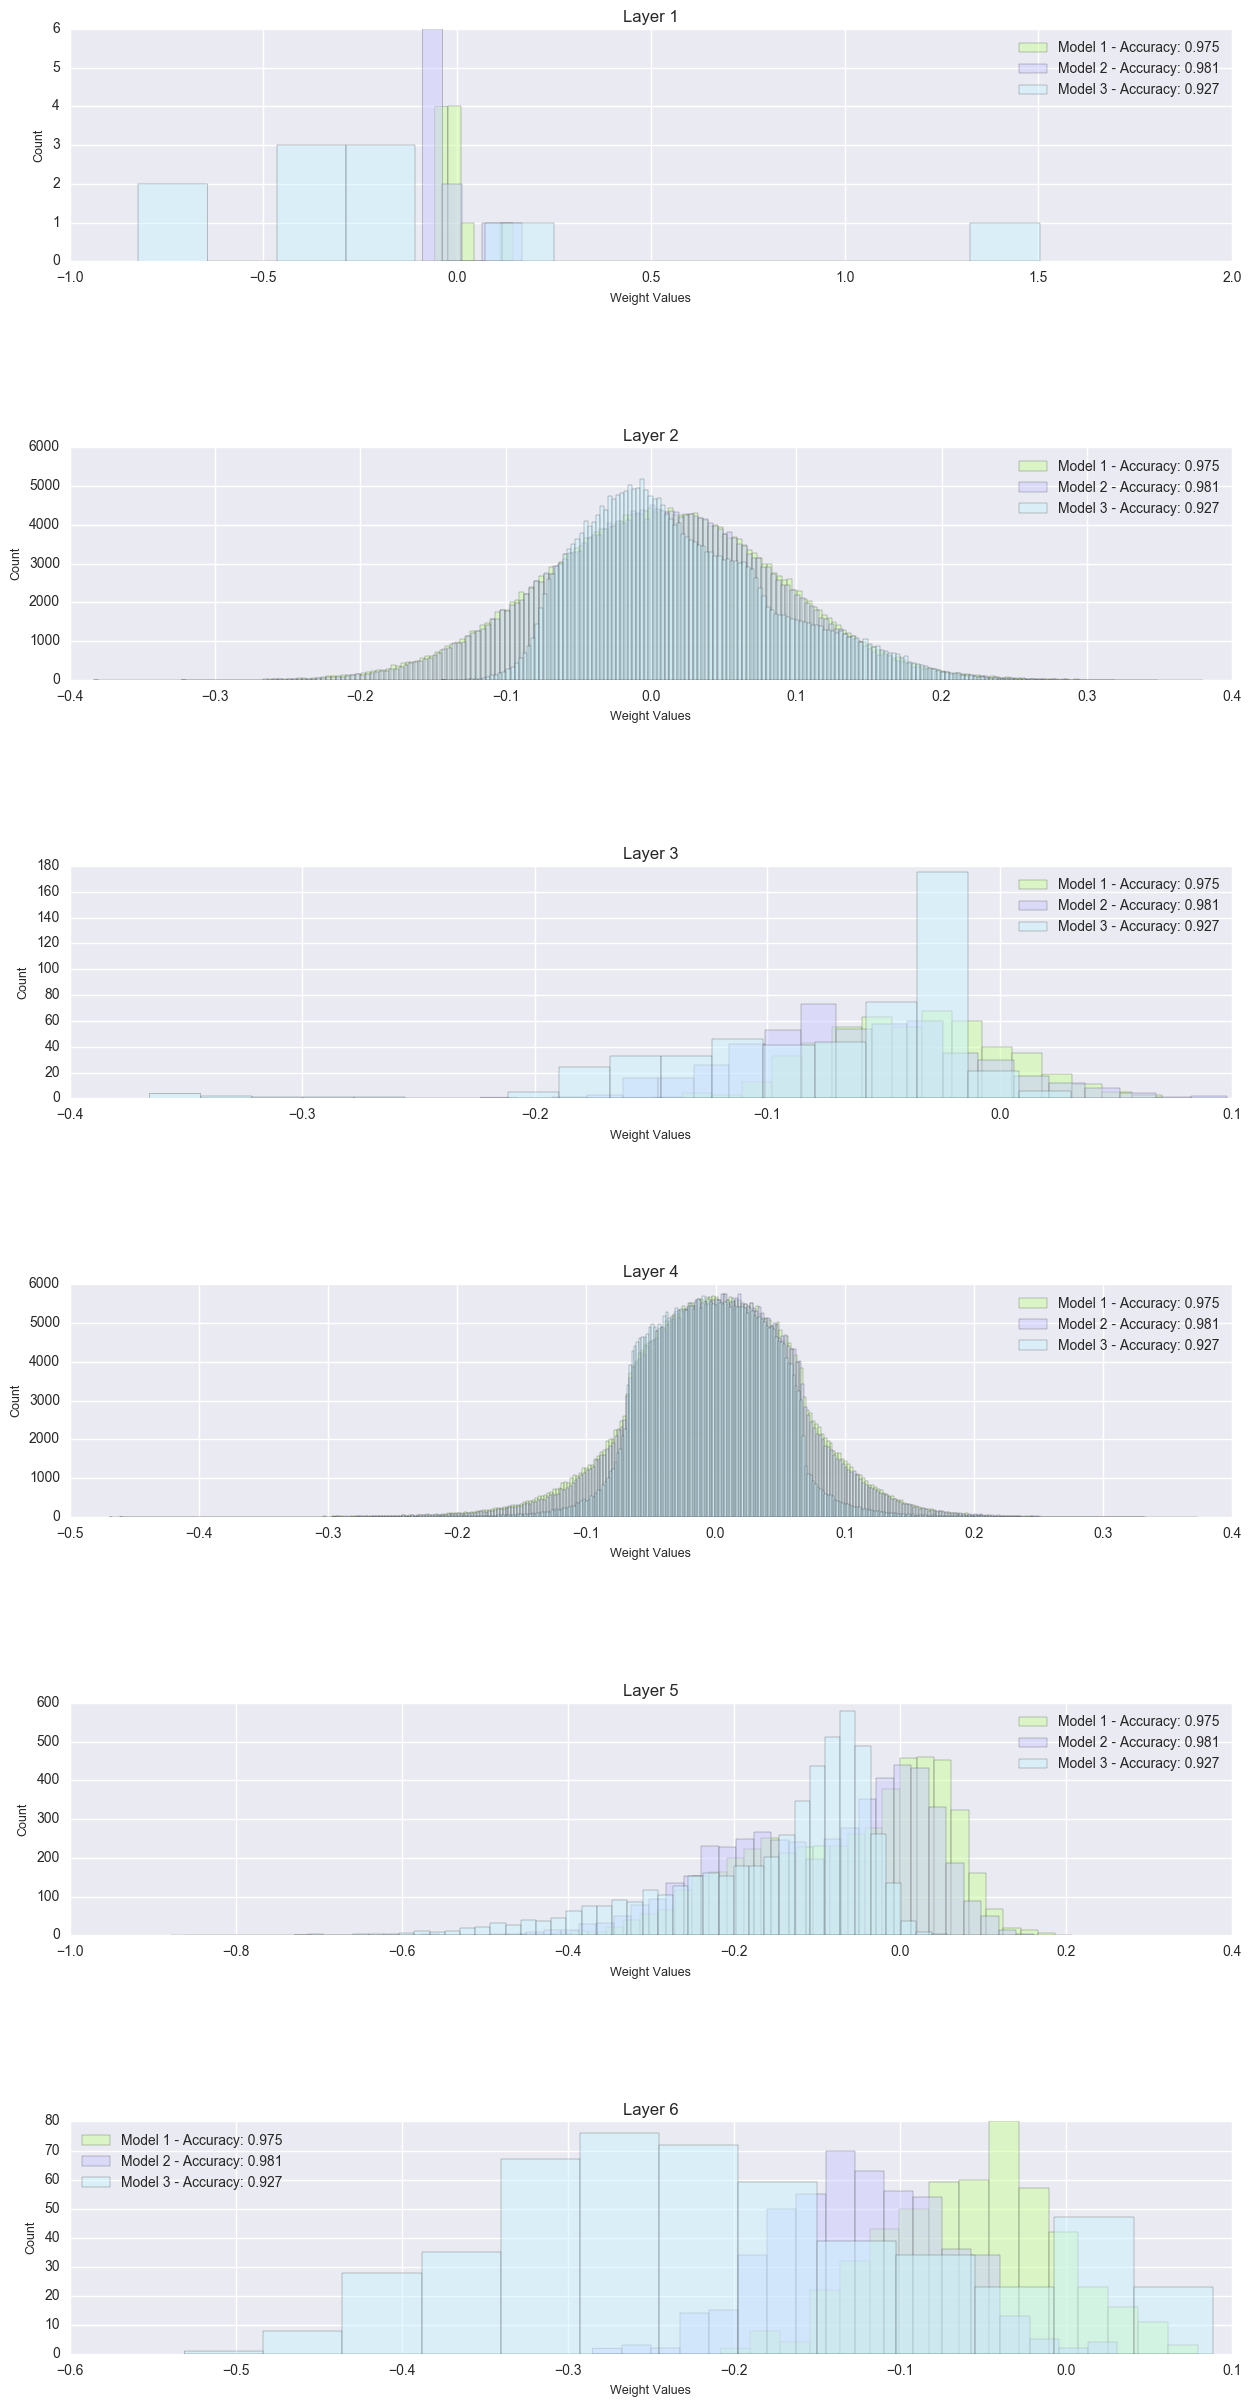

In [41]:
plot_layers()

# References

## Keras
- https://keras.io/getting-started/sequential-model-guide/
- https://keras.io/models/sequential/#sequential-model-methods

## Numpy and Images
- http://scikit-image.org/docs/dev/user_guide/numpy_images.html
- astropy, but useful: http://prancer.physics.louisville.edu/astrowiki/index.php/Image_processing_with_Python_and_SciPy
- https://www.safaribooksonline.com/library/view/programming-computer-vision/9781449341916/ch01.html

## Resizing images for NN processing
- https://datascience.stackexchange.com/questions/5224/how-to-prepare-images-for-neural-network

## Database
- MongoDB: https://realpython.com/blog/python/introduction-to-mongodb-and-python/

## Saving Net One Step at a Time
- https://github.com/fchollet/keras/issues/85

## Dict to JSON
- http://robotfantastic.org/serializing-python-data-to-json-some-edge-cases.html

## Batch Size Explained Well
- https://stats.stackexchange.com/questions/153531/what-is-batch-size-in-neural-network

## Datasets

#### MIT Places
The compressed file of resized 256*256 images, containing train set and validation set of Places 205.
http://data.csail.mit.edu/places/places205/imagesPlaces205_resize.tar.gz